<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="240" height="240" align="center"/>


# MLA 701. Du RNN au deep RNN [prédiction de séries temporelles]

In [1]:
# Dans ce notebook, nous allons nous intéresser à des tâches d'analyse prédictive de séries temporelles
# Par exemple, pour prédire la météo de demain ou le cours de la bourse

# Ce notebook vise à apprendre : 
# - L'organisation des données de séries temporelles numériques en batches
# - La compréhension des architectures RNN et la capacité à réaliser le schéma d'un réseau RNN et d'en expliciter
# les paramètres et les méta-paramètres
# - La comparaison d'un RNN à la vanille avec un RNN profond


In [2]:
# On importe les librairies de base pour le calcul et l'affichage
import numpy as np
import math
import matplotlib.pyplot as plt

n_time  = 50      # longueur de la série temporelle
n_batch = 1000    # nombre de batches
# proportion des données dans les ensembles d'entrainement, validation, et test
r_trn   = 0.8     
r_val   = 0.1 
r_tst   = 0.1
# taille des ensembles
n_trn = int(r_trn * n_batch)
n_val = int(r_val * n_batch)
n_tst = int(r_tst * n_batch)

# Fonction pour créer nbatch séries temporelles de longueur n_time
def create_time_serie(batch_size, n_time):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_time)
    serie = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))    # + sinus 1
    serie += 0.4 * np.sin((time - offsets2) * (freq2 * 20 + 20))   # + sinus 2
    serie += 0.1 * (np.random.rand(batch_size, n_time) - 0.5)      # + bruit aléatoire
    return serie[..., np.newaxis].astype(np.float32)

# On créée un jeu de séries temporelles
serie = create_time_serie(n_batch, n_time + 1)

# On crée les ensembles
X_train, y_train = serie[:n_trn, :n_time], serie[:n_trn, -1]
X_valid, y_valid = serie[n_trn:n_trn+n_val, :n_time], serie[n_trn:n_trn+n_val, -1]
X_test, y_test   = serie[n_trn+n_val:, :n_time], serie[n_trn+n_val:, -1]

# Question : à partir de l'organisation des données d'entrée/sortie, 
# quelle est la tâche que l'on cherche à résoudre? 

Text(0.5, 0, 'time [in samples]')

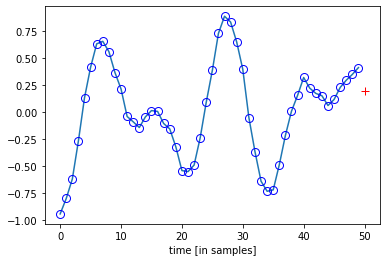

In [3]:
# Pour répondre à cette question, on trace un batch de données 
i_batch = 100
plt.plot(X_train[i_batch])
plt.plot(X_train[i_batch], 'bo', fillstyle='none', markersize=8)
plt.plot(n_time, y_train[i_batch], 'r+',  markersize=8)
plt.xlabel("time [in samples]")

# Donc?

In [4]:
# On importe les librairies de TF pour l'apprentissage
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

# On créé quelques paramètres d'entrée du réseau
hid_dim    = 1
n_epoch    = 20

# On instancie le réseau
RNN_model  = Sequential(name="RNN_model")
RNN_model.add(SimpleRNN(hid_dim, input_shape=[None, 1], stateful=False, return_sequences=False, name='RNN'))

# Questions : 
# 1) Réaliser le schéma de ce réseau
# Et Expliciter les méta-paramètres de ce réseau (y compris ceux utilisés par défaut)
# 2) Que signifient les parmaètres : "stateful=False" et "return_sequences=False" ?
# 3) Est-ce justifié dans ce cas? Expliquer.

# On compile le réseau
RNN_model.compile(loss='mse', optimizer='adam')

# On visualise la structure du réseau
RNN_model.summary()

# On apprend le modèle
history = RNN_model.fit(X_train, y_train, epochs=n_epoch,
                    validation_data=(X_valid, y_valid))

L_val = RNN_model.evaluate(X_valid, y_valid)

print("")
print("La loss MSE sur le jeu de validation est de: {}" .format(L_val))


Model: "RNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN (SimpleRNN)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 1s 12ms/step - loss: 0.1070 - val_loss: 0.1097
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1002 - val_loss: 0.1038
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.0992
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 0.0952
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 0.0915
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0846 - val_loss: 0.0881
Ep

4/4 [==============================] - 0s 2ms/step - loss: 0.0465

La loss MSE sur l'ensemble de test est de: 0.04654733091592789


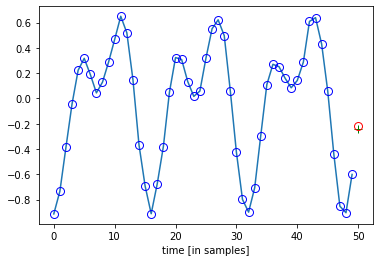

In [5]:
# On prédit sur l'ensemble de test
y_hat = RNN_model.predict(X_test)

# On trace un résultat
i_batch = 0
plt.plot(X_test[i_batch])
plt.plot(X_test[i_batch], 'bo', fillstyle='none', markersize=8)
plt.plot(n_time, y_test[i_batch], 'g+',  markersize=8)
plt.plot(n_time, y_hat[i_batch], 'ro',  fillstyle='none', markersize=8)
plt.xlabel("time [in samples]")

# On évalue la loss sur l'ensemble de test
L_tst = RNN_model.evaluate(X_test, y_test)

print("")
print("La loss MSE sur l'ensemble de test est de: {}" .format(L_tst))

# Question : 
# 1) la prédiction (alt. la performance) est-elle satisfaisante? Justifier.
# 2) proposer une solution pour améliorer la performance du réseau


In [6]:
# On recommence mais avec un réseau profond (3 couches RNN) et plus de neurones par couche
# On créé quelques paramètres d'entrée du réseau
hid_dim    = 10
n_epoch    = 20

# On instancie le réseau
DRNN_model  = Sequential(name="DRNN_model")
DRNN_model.add(SimpleRNN(hid_dim, input_shape=[None, 1], return_sequences=True, name='RNN_layer1'))
DRNN_model.add(SimpleRNN(hid_dim, return_sequences=True, name='RNN_layer2'))
DRNN_model.add(SimpleRNN(1, return_sequences=False, name='RNN_layer3'))

# Question : 
# Même questions que précédemment mais pour les 3 couches

# On compile le réseau
DRNN_model.compile(loss='mse', optimizer='adam')

# On visualise la structure du réseau
DRNN_model.summary()

# On apprend le modèle
history = DRNN_model.fit(X_train, y_train, epochs=n_epoch,
                    validation_data=(X_valid, y_valid))

L_val = DRNN_model.evaluate(X_valid, y_valid)

print("")
print("La loss MSE sur le jeu de validation est de: {}" .format(L_val))

Model: "DRNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN_layer1 (SimpleRNN)      (None, None, 10)          120       
                                                                 
 RNN_layer2 (SimpleRNN)      (None, None, 10)          210       
                                                                 
 RNN_layer3 (SimpleRNN)      (None, 1)                 12        
                                                                 
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/25 [==============================] - 2s 23ms/step - loss: 0.3785 - val_loss: 0.2821
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.1295 - val_loss: 0.0802
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0511 - val_loss: 0.0456
Epoch 4/20
25/25 [=======

4/4 [==============================] - 0s 5ms/step - loss: 0.0128

La loss MSE sur l'ensemble de test est de: 0.012755981646478176


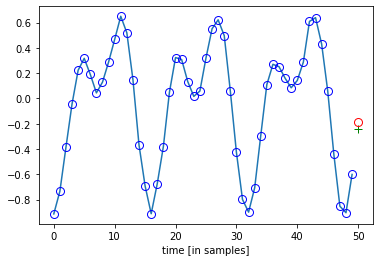

In [7]:
# On prédit sur l'ensemble de test
y_hat = DRNN_model.predict(X_test)

# On trace un résultat
i_batch = 0
plt.plot(X_test[i_batch])
plt.plot(X_test[i_batch], 'bo', fillstyle='none', markersize=8)
plt.plot(n_time, y_test[i_batch], 'g+',  markersize=8)
plt.plot(n_time, y_hat[i_batch], 'ro',  fillstyle='none', markersize=8)
plt.xlabel("time [in samples]")

# On évalue la loss sur l'ensemble de test
L_tst = DRNN_model.evaluate(X_test, y_test)

print("")
print("La loss MSE sur l'ensemble de test est de: {}" .format(L_tst))

# Question : 
# 1) maintenant, la prédiction (alt. la performance) est-elle satisfaisante? Justifier.

In [ ]:
# Question : conclusions?